## ARIMA model for prediction

### (based on the "sunspot prediction" tutorial: http://www.pyflux.com/arima-models/)

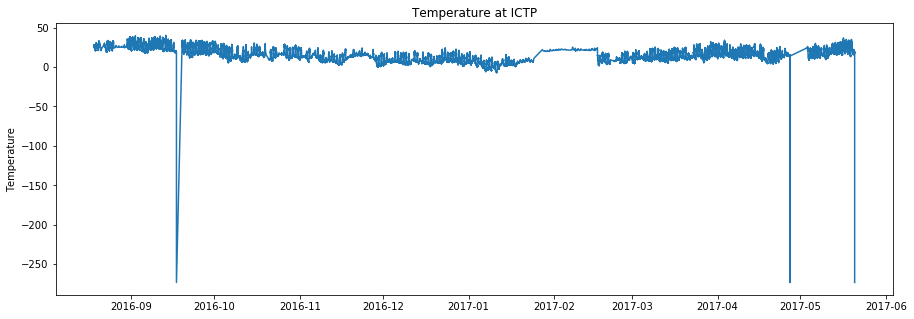

In [2]:
# http://www.pyflux.com
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

# Get Rodrigo's data set, recorded at ICTP
total = read_csv('TS_60917.csv') 
total.index = pd.DatetimeIndex(total['created_at'])

plt.figure(figsize=(15,5))
plt.plot(total.index,total['Temperature'])
plt.ylabel('Temperature')
plt.title('Temperature at ICTP');

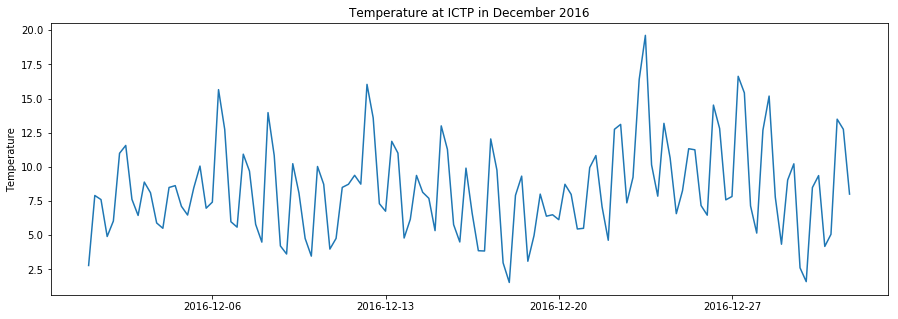

In [3]:
# Just use a short sequence at year's end
data=total[datetime(2016, 12, 1, 0, 0, 0):datetime(2016, 12, 31, 23, 59, 59)]

# and use only data points at every 6 hours
data=data.resample('6H').median()
plt.figure(figsize=(15,5))
plt.plot(data.index,data['Temperature'])
plt.ylabel('Temperature')
plt.title('Temperature at ICTP in December 2016');

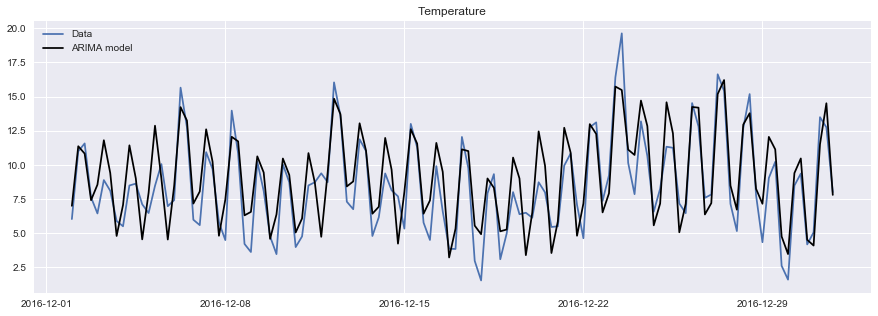

In [4]:
# Create an Auto-Regressive Integrated Moving Average model
model = pf.ARIMA(data=data,ar=4,ma=4,integ=0,target='Temperature')

# Fit it
x = model.fit("MLE")
model.plot_fit(figsize=(15,5))

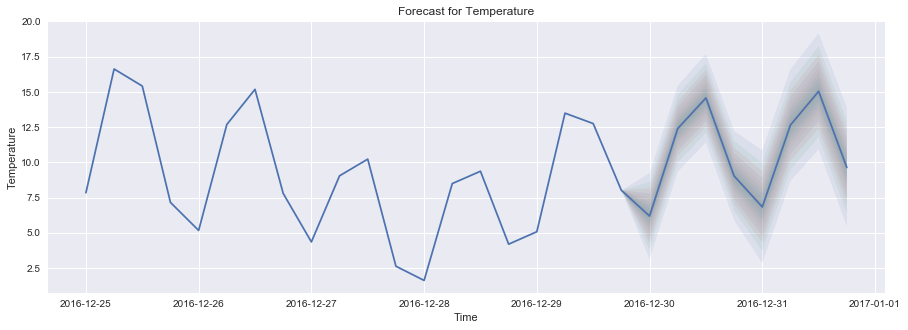

In [9]:
# Try prediction for 2 days (8 intervals)
model.plot_predict(h=8,past_values=20,figsize=(15,5))

Summary: the daily cycle is captured reliably; the confidence region indicates the uncertainty